# K均值算法（K-means）聚类

## 【关键词】K个种子，均值

## 一、K-means算法原理

### 聚类的概念：一种无监督的学习，事先不知道类别，自动将相似的对象归到同一个簇中。

K-Means算法是一种聚类分析（cluster analysis）的算法，其主要是来计算数据聚集的算法，主要通过不断地取离种子点最近均值的算法。

K-Means算法主要解决的问题如下图所示。我们可以看到，在图的左边有一些点，我们用肉眼可以看出来有四个点群，但是我们怎么通过计算机程序找出这几个点群来呢？于是就出现了我们的K-Means算法

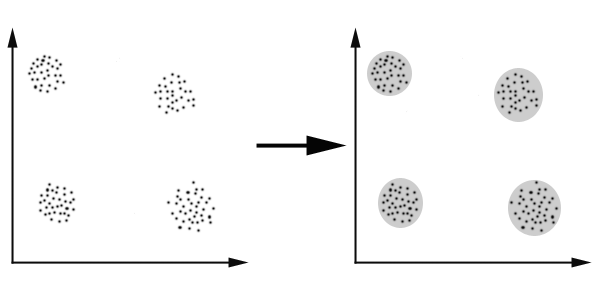

这个算法其实很简单，如下图所示：

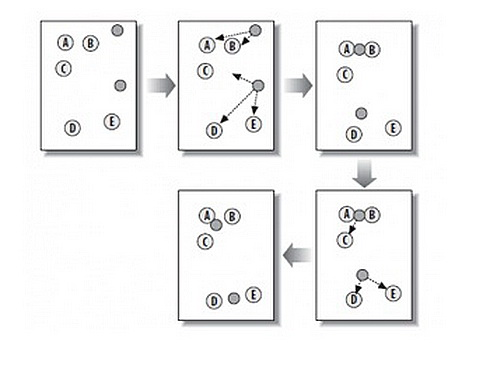

从上图中，我们可以看到，A，B，C，D，E是五个在图中点。而灰色的点是我们的种子点，也就是我们用来找点群的点。有两个种子点，所以K=2。

然后，K-Means的算法如下：

1. 随机在图中取K（这里K=2）个种子点。
2. 然后对图中的所有点求到这K个种子点的距离，假如点Pi离种子点Si最近，那么Pi属于Si点群。（上图中，我们可以看到A，B属于上面的种子点，C，D，E属于下面中部的种子点）
3. 接下来，我们要移动种子点到属于他的“点群”的中心。（见图上的第三步）
4. 然后重复第2）和第3）步，直到，种子点没有移动（我们可以看到图中的第四步上面的种子点聚合了A，B，C，下面的种子点聚合了D，E）。

这个算法很简单，重点说一下“求点群中心的算法”：欧氏距离（Euclidean Distance）：差的平方和的平方根

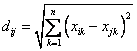


### K-Means主要最重大的缺陷——都和初始值有关：

K是事先给定的，这个K值的选定是非常难以估计的。很多时候，事先并不知道给定的数据集应该分成多少个类别才最合适。（ISODATA算法通过类的自动合并和分裂，得到较为合理的类型数目K）

K-Means算法需要用初始随机种子点来搞，这个随机种子点太重要，不同的随机种子点会有得到完全不同的结果。（K-Means++算法可以用来解决这个问题，其可以有效地选择初始点）

### 总结：K-Means算法步骤：

1. 从数据中选择k个对象作为初始聚类中心;
2. 计算每个聚类对象到聚类中心的距离来划分；
3. 再次计算每个聚类中心
4. 计算标准测度函数，直到达到最大迭代次数，则停止，否则，继续操作。
5. 确定最优的聚类中心

### K-Means算法应用

看到这里，你会说，K-Means算法看来很简单，而且好像就是在玩坐标点，没什么真实用处。而且，这个算法缺陷很多，还不如人工呢。是的，前面的例子只是玩二维坐标点，的确没什么意思。但是你想一下下面的几个问题：

1）如果不是二维的，是多维的，如5维的，那么，就只能用计算机来计算了。

2）二维坐标点的X，Y 坐标，其实是一种向量，是一种数学抽象。现实世界中很多属性是可以抽象成向量的，比如，我们的年龄，我们的喜好，我们的商品，等等，能抽象成向量的目的就是可以让计算机知道某两个属性间的距离。如：我们认为，18岁的人离24岁的人的距离要比离12岁的距离要近，鞋子这个商品离衣服这个商品的距离要比电脑要近，等等。

## 二、实战

重要参数：
- n_clusters：聚类的个数

重要属性：
- cluster_centers_ : [n_clusters, n_features]的数组，表示聚类中心点的坐标
- labels_ : 每个样本点的标签


### 1、聚类实例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

导包，使用make_blobs生成随机点cluster_std

In [3]:
from sklearn.datasets import make_blobs

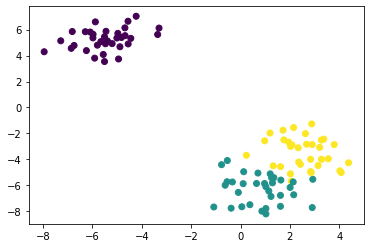

In [4]:
data, target = make_blobs()
plt.scatter(data[:, 0], data[:, 1], c=target)

建立模型,训练数据，并进行数据预测，使用相同数据

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.predict(data)

array([2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1,
       1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1])

In [7]:
kmeans.labels_

array([2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 1,
       1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1])

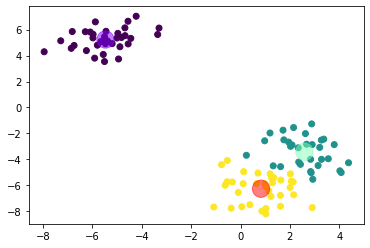

In [12]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c=[1, 2, 3], cmap='rainbow', s=300, alpha=0.5)

无监督的情况下进行计算，预测
现在机器学习没有目标

In [10]:
centers = kmeans.cluster_centers_

绘制图形，显示聚类结果kmeans.cluster_centers

### 2、 实战，三问中国足球几多愁？

导包，3D图像需导包：from mpl_toolkits.mplot3d import Axes3D  
读取数据

列名修改为："国家","2006世界杯","2010世界杯","2007亚洲杯"

In [15]:
football = pd.read_csv('../../data/AsiaFootball.txt', header=None, names=["国家","2006世界杯","2010世界杯","2007亚洲杯"])
football

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2
5,伊拉克,50,50,1
6,卡塔尔,50,40,9
7,阿联酋,50,40,9
8,乌兹别克斯坦,40,40,5
9,泰国,50,50,9


使用K-Means进行数据处理，对亚洲球队进行分组，分三组

In [16]:
kmeans = KMeans(3)
kmeans.fit(football.iloc[:, 1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

for循环打印输出分组后的球队，argwhere()

In [20]:
country = football.国家.values
country

array(['中国', '日本', '韩国', '伊朗', '沙特', '伊拉克', '卡塔尔', '阿联酋', '乌兹别克斯坦', '泰国',
       '越南', '阿曼', '巴林', '朝鲜', '印尼'], dtype=object)

In [21]:
labels = kmeans.labels_
labels

array([0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0])

In [22]:
np.c_[country, labels]

array([['中国', 0],
       ['日本', 1],
       ['韩国', 1],
       ['伊朗', 2],
       ['沙特', 2],
       ['伊拉克', 0],
       ['卡塔尔', 0],
       ['阿联酋', 0],
       ['乌兹别克斯坦', 2],
       ['泰国', 0],
       ['越南', 0],
       ['阿曼', 0],
       ['巴林', 2],
       ['朝鲜', 2],
       ['印尼', 0]], dtype=object)

In [24]:
country[labels == 0]

array(['中国', '伊拉克', '卡塔尔', '阿联酋', '泰国', '越南', '阿曼', '印尼'], dtype=object)

In [27]:
for i in range(3):
    cond = (labels == i)
    for c in country[cond]:
        print(c, end=' ')
    print()

中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 
日本 韩国 
伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 


绘制三维立体图形,ax = plt.subplot(projection  = '3d')  
ax.scatter3D()

In [30]:
centers = kmeans.cluster_centers_
centers

array([[50. , 47.5,  7.5],
       [22.5, 12. ,  3.5],
       [34.6, 38.4,  7.6]])

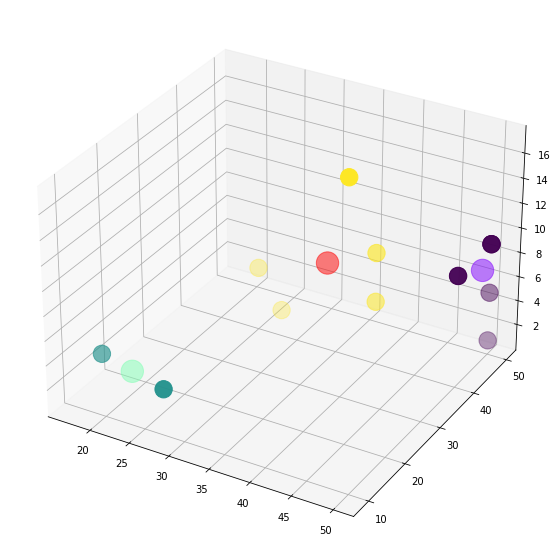

In [31]:
plt.figure(figsize=(10, 10))
axes = plt.subplot(projection='3d')
axes.scatter3D(football.iloc[:, 1], football.iloc[:, 2], football.iloc[:, 3], c=labels, s= 300)
# 聚类中心点
axes.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], c=[0, 1, 2], s=500, alpha=0.5, cmap='rainbow')

### 3、聚类实践与常见错误

导包，使用make_blobs创建样本点

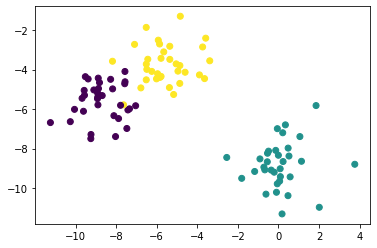

In [34]:
data, target = make_blobs()
plt.scatter(data[:, 0], data[:, 1], c=target)

第一种错误，k值不合适，make_blobs默认中心点三个

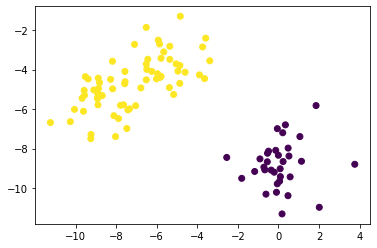

In [35]:
kmeans = KMeans(2)
kmeans.fit(data)
labels = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)

第二种错误,数据偏差  
trans = [[0.6,-0.6],[-0.4,0.8]]  
X2 = np.dot(X,trans)

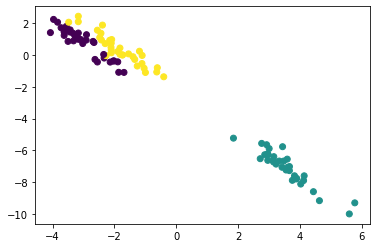

In [36]:
trans = np.array([[0.6,-0.6],[-0.4,0.8]])
data_trans = np.dot(data, trans)
plt.scatter(data_trans[:, 0], data_trans[:, 1], c=target)

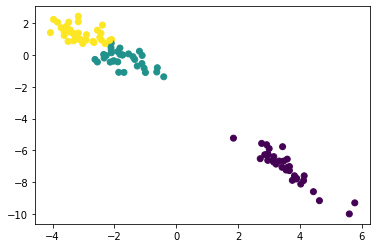

In [38]:
kmeans = KMeans(3)
kmeans.fit(data_trans)
labels = kmeans.labels_
plt.scatter(data_trans[:, 0], data_trans[:, 1], c=labels)

In [ ]:
data_trans = data. trans
data_trans. trans^-1 = data.trans.trans^-1

In [39]:
data_corrected = np.dot(data_trans, np.linalg.inv(trans))

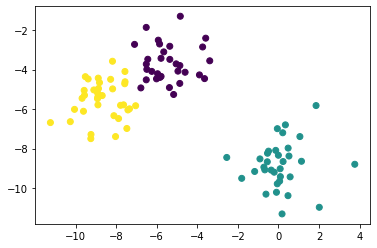

In [40]:
kmeans = KMeans(3)
kmeans.fit(data_corrected)
labels = kmeans.labels_
plt.scatter(data_corrected[:, 0], data_corrected[:, 1], c=labels)

第三个错误:标准偏差不相同cluster_std

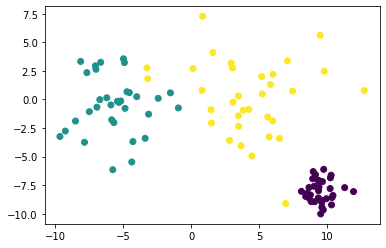

In [44]:
data, target = make_blobs(cluster_std=[1, 2, 3])
plt.scatter(data[:, 0], data[:, 1], c=target)

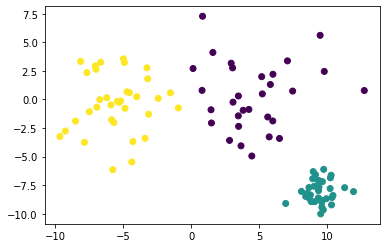

In [45]:
kmeans = KMeans(3)
kmeans.fit(data)
labels = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)

第四个错误：样本数量不同

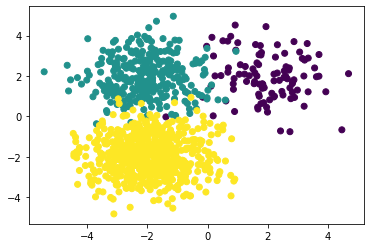

In [46]:
n1 = np.random.randn(100, 2) + (2, 2)
n2 = np.random.randn(300, 2) + (-2, 2)
n3 = np.random.randn(600, 2) + (-2, -2)
data = np.vstack((n1, n2, n3))
target = [0] * 100 + [1] * 300 + [2] * 600
plt.scatter(data[:, 0], data[:, 1], c=target)

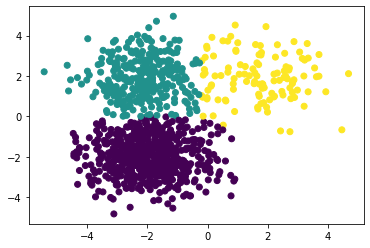

In [47]:
kmeans = KMeans(3)
kmeans.fit(data)
labels = kmeans.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels)

In [ ]:
# k尽量合理.
# 数据偏差
# 标准偏差
# 样本数量

### 4、K-Means图片颜色点分类

In [48]:
from sklearn.datasets import load_sample_image

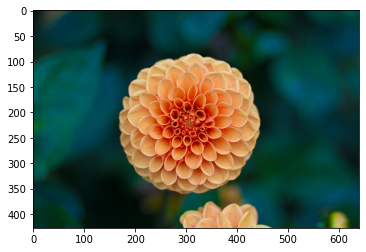

In [49]:
image = load_sample_image('flower.jpg')
plt.imshow(image)

In [50]:
from pandas import DataFrame

In [51]:
df = DataFrame(data=image.reshape(-1, 3))
df

,0,1,2
0,2,19,13
1,3,18,13
2,7,20,13
3,8,21,14
4,6,21,14
...,...,...,...
273275,3,45,25
273276,4,46,26
273277,7,46,28
273278,8,45,28


In [53]:
# 说明有210339个像素点的颜色重复了.
df.duplicated().sum()

210339

In [54]:
(~df.duplicated()).sum()

62941

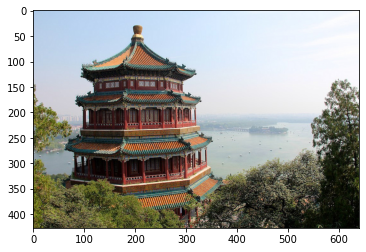

In [55]:
china = load_sample_image('china.jpg')
plt.imshow(china)

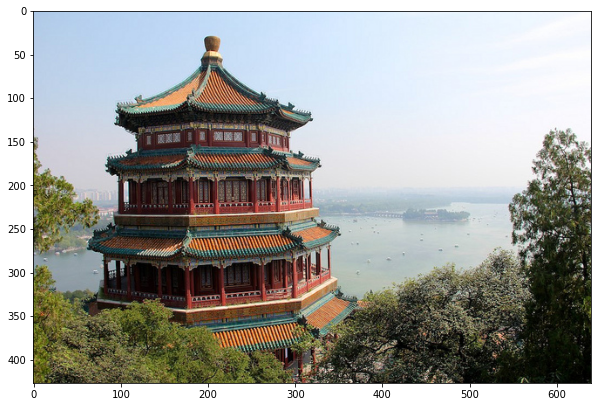

In [56]:
plt.figure(figsize=(10, 8))
plt.imshow(china)

In [57]:
df = DataFrame(data=china.reshape(-1, 3))
(~df.duplicated()).sum()

96615

In [ ]:
# 人的肉眼分辨不了颜色, 所以对颜色进行聚类. 找到图片的主要颜色. 用主要颜色重新生成图片

In [58]:
data = china.reshape(-1, 3).copy()

In [60]:
data.shape

(273280, 3)

In [59]:
kmeans = KMeans(64)
kmeans.fit(data)

KeyboardInterrupt: 

In [61]:
# 直接用原始数据进行训练耗时过长, 采用抽样的办法.
# 先把数据打散, 打乱.
# np.random.shuffle
from sklearn.utils import shuffle

In [62]:
data_shuffled = shuffle(data)

In [63]:
data_shuffled

array([[ 42,  46,  58],
       [ 29,  36,  28],
       [140, 125,  94],
       ...,
       [ 51,  22,  24],
       [ 86, 112,  83],
       [ 61,  76,  47]], dtype=uint8)

In [64]:
data

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [ 43,  49,  39],
       [ 13,  21,   6],
       [ 15,  24,   7]], dtype=uint8)

In [91]:
# 取打乱之后的前1000个数据进行训练.
kmeans = KMeans(32)
kmeans.fit(data_shuffled[:1000])
main_colors = kmeans.cluster_centers_
labels = kmeans.predict(data)
new_image = main_colors[labels].reshape(*china.shape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=32, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
# 用聚类出来的64种颜色生成新的图片
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [70]:

labels

array([52, 52, 52, ..., 13, 40, 40])

In [72]:
main_colors

array([[159.9       , 178.7       , 180.3       ],
       [ 36.53333333,  40.33333333,  37.73333333],
       [217.52631579, 234.60526316, 252.55263158],
       [104.6       , 105.1       ,  89.2       ],
       [190.        , 160.5       , 134.5       ],
       [ 82.        ,  84.5       ,  36.6       ],
       [206.91304348, 214.26086957, 223.7826087 ],
       [ 24.875     ,   6.25      ,   3.875     ],
       [245.26027397, 247.83561644, 253.31506849],
       [148.5       , 143.83333333, 106.        ],
       [220.25      , 108.        ,  96.25      ],
       [ 96.47619048,  88.9047619 ,  67.19047619],
       [143.76923077, 144.07692308, 134.76923077],
       [ 53.6       ,  47.15      ,  39.15      ],
       [191.3902439 , 214.02439024, 240.26829268],
       [ 52.875     ,  72.375     ,  69.        ],
       [132.42857143, 100.28571429,  51.        ],
       [ 23.27272727,  24.54545455,  22.12121212],
       [190.42307692, 200.38461538, 202.11538462],
       [115.88888889, 133.11111

In [80]:
data.shape

(273280, 3)

In [81]:
china.shape

(427, 640, 3)

In [85]:
new_image

array([[[185.14285714, 207.75      , 232.39285714],
        [185.14285714, 207.75      , 232.39285714],
        [185.14285714, 207.75      , 232.39285714],
        ...,
        [245.26027397, 247.83561644, 253.31506849],
        [245.26027397, 247.83561644, 253.31506849],
        [245.26027397, 247.83561644, 253.31506849]],

       [[185.14285714, 207.75      , 232.39285714],
        [185.14285714, 207.75      , 232.39285714],
        [185.14285714, 207.75      , 232.39285714],
        ...,
        [245.26027397, 247.83561644, 253.31506849],
        [245.26027397, 247.83561644, 253.31506849],
        [245.26027397, 247.83561644, 253.31506849]],

       [[185.14285714, 207.75      , 232.39285714],
        [185.14285714, 207.75      , 232.39285714],
        [185.14285714, 207.75      , 232.39285714],
        ...,
        [245.26027397, 247.83561644, 253.31506849],
        [245.26027397, 247.83561644, 253.31506849],
        [245.26027397, 247.83561644, 253.31506849]],

       ...,

      

(-0.5, 639.5, 426.5, -0.5)

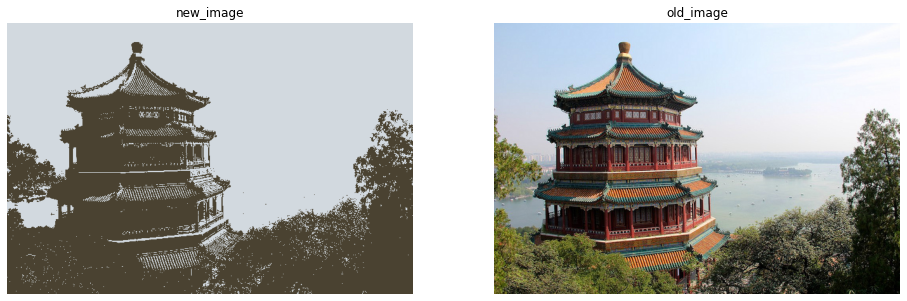

In [96]:
kmeans = KMeans(2)
kmeans.fit(data_shuffled[:1000])
main_colors = kmeans.cluster_centers_
labels = kmeans.predict(data)
new_image = main_colors[labels].reshape(*china.shape)

plt.imsave('./new_china.png', new_image / 255)

plt.figure(figsize=(8 * 2, 6))
axes1 = plt.subplot(1, 2, 1)
axes1.imshow(new_image / 255)
axes1.set_title('new_image')
axes1.axis('off')

axes2 = plt.subplot(1, 2, 2)
axes2.imshow(china)
axes2.set_title('old_image')
axes2.axis('off')

In [89]:
plt.imsave('./china.png', china)

In [94]:
plt.imsave('./new_china.png', new_image / 255)

In [73]:
a = np.random.randint(0, 100, size=10)
a

array([33, 91, 33, 23, 86, 18, 51, 66, 22, 82])

In [75]:
index = np.arange(10)

In [76]:
index

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
# 按照index中指定索引顺序取a中的值 
a[np.array([1, 5, 2, 6, 3, 8, 9, 9, 1, 2, 3, 4])]

array([91, 18, 33, 51, 23, 22, 82, 82, 91, 33, 23, 86])

In [97]:
labels[]

0

In [99]:
# 写个函数生成新图片.
def create_new_image(h, w, labels, main_colors):
    # 产生一个空白图片
    new_image = np.ones(shape=(h, w, 3))
    # 循环取图片中的像素点
    count = 0
    for i in range(h):
        for j in range(w):
            index = labels[count]
            new_image[i, j] = main_colors[index]
            count += 1
            
    return new_image / 255

In [100]:
china.shape

(427, 640, 3)

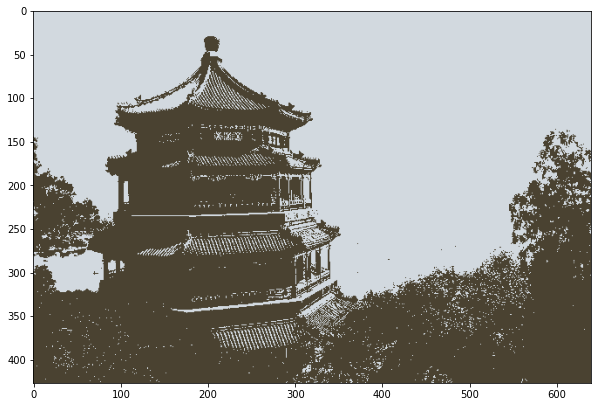

In [101]:
new_china = create_new_image(427, 640, labels, main_colors)
plt.figure(figsize=(10, 8))
plt.imshow(new_china)

加载图片/创建模型/训练数据/获取labels

使用pairwise_distances_argmin算法生成随机labels

创造方法，重新合成图片

数据可视化

## 三、作业

### 1、分析ex7data2.mat文件

找出最佳聚类数目，并画出聚类的中心点

`
from scipy.io import loadmat
from sklearn.cluster import KMeans
data = loadmat('../data/ex7data2.mat')
X = data['X']
X.shape
`

### 2、图片压缩

使用聚类压缩图片

`
img = plt.imread('../data/bird_small.png')
img_shape = img.shape
img_shape
`

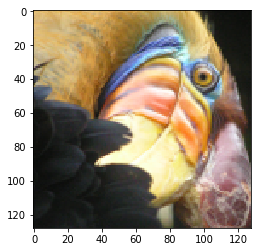

In [4]:
plt.imshow(bird)